In [6]:
# Gerekli kütüphaneler
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# 1. Lemmatized dosyasını oku
df_lemmatized = pd.read_csv("lemmatized_sentences.csv", header=None)
df_lemmatized.columns = ['sentence']
df_lemmatized = df_lemmatized.dropna()  # Boş satırları çıkar

# 2. Giriş cümlesini seç (örnek olarak index 14)
giris_cumlesi = df_lemmatized.iloc[14]['sentence']

# 3. Tüm cümleleri listeye aktar
corpus = df_lemmatized['sentence'].tolist()

# 4. TF-IDF vektörleştirme
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(corpus)

# 5. Giriş cümlesinin vektörü
giris_vector = vectorizer.transform([giris_cumlesi])

# 6. Cosine similarity hesapla
similarity_scores = cosine_similarity(giris_vector, tfidf_matrix).flatten()

# 7. En benzer 5 cümleyi al (kendisi hariç)
top_indices = similarity_scores.argsort()[::-1][1:6]
top_sentences = [corpus[i] for i in top_indices]
top_scores = [similarity_scores[i] for i in top_indices]

# 8. Sonuçları yazdır
print("Giriş Cümlesi:")
print(giris_cumlesi)
print("\nEn Benzer 5 Cümle ve TF-IDF Benzerlik Skorları:\n")
for i, (sent, score) in enumerate(zip(top_sentences, top_scores), 1):
    print(f"{i}. {sent} — Skor: {score:.4f}")


Giriş Cümlesi:
probation appellant quashawn sheridan convicted obstructing resisting officer flight failure register law enforcement convicted person within hour

En Benzer 5 Cümle ve TF-IDF Benzerlik Skorları:

1. sheridan subsequently convicted two misdemeanor obstructing resisting officer flight violation reno municipal code b failure register law enforcement convicted person within hour violation nrs — Skor: 0.6928
2. violation nrs categorically crime violence sheridan also convicted nrs failure register law enforcement convicted person within hour — Skor: 0.6323
3. hold obstructing resisting officer flight failure register law enforcement convicted person within hour categorically crime violence absent specific factual finding support conclusion crime constituted one violence — Skor: 0.5499
4. violation rmc categorically constitute crime uiolence sheridan convicted rmc b obstructing resisting officer flight — Skor: 0.3614
5. appellant v — Skor: 0.2525


In [5]:
# Gerekli kütüphaneler
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# 1. Stemmed dosyasını oku
df_stemmed = pd.read_csv("stemmed_sentences.csv", header=None)
df_stemmed.columns = ['sentence']  # Sütun adı ver
df_stemmed = df_stemmed.dropna()   # Boş satırları çıkar

# 2. Giriş cümlesini seç (örnek: index 14)
giris_cumlesi = df_stemmed.iloc[14]['sentence']

# 3. Tüm cümleleri listeye aktar
corpus = df_stemmed['sentence'].tolist()

# 4. TF-IDF vektörleştirme işlemi
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(corpus)

# 5. Giriş cümlesini vektörleştir
giris_vector = vectorizer.transform([giris_cumlesi])

# 6. Cosine similarity hesapla
similarity_scores = cosine_similarity(giris_vector, tfidf_matrix).flatten()

# 7. En benzer 5 cümleyi seç (giriş cümlesi hariç)
top_indices = similarity_scores.argsort()[::-1][1:6]
top_sentences = [corpus[i] for i in top_indices]
top_scores = [similarity_scores[i] for i in top_indices]

# 8. Sonuçları yazdır
print("Giriş Cümlesi:")
print(giris_cumlesi)
print("\nEn Benzer 5 Cümle ve TF-IDF Benzerlik Skorları:\n")
for i, (sent, score) in enumerate(zip(top_sentences, top_scores), 1):
    print(f"{i}. {sent} — Skor: {score:.4f}")



Giriş Cümlesi:
probat appel quashawn sheridan convict obstruct resist offic flight failur regist law enforc convict person within hour

En Benzer 5 Cümle ve TF-IDF Benzerlik Skorları:

1. sheridan subsequ convict two misdemeanor obstruct resist offic flight violat reno municip code b failur regist law enforc convict person within hour violat nr — Skor: 0.6683
2. violat nr categor crime violenc sheridan also convict nr failur regist law enforc convict person within hour — Skor: 0.5889
3. hold obstruct resist offic flight failur regist law enforc convict person within hour categor crime violenc absent specif factual find support conclus crime constitut one violenc — Skor: 0.5453
4. violat rmc categor constitut crime uiolenc sheridan convict rmc b obstruct resist offic flight — Skor: 0.3289
5. therefor conclud district court er find sheridan flight convict nontechn violat probat — Skor: 0.2072


In [7]:
# Gerekli kütüphaneler
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# 1. Lemmatized dosyasını oku
df_lemmatized = pd.read_csv("lemmatized_sentences.csv", header=None)
df_lemmatized.columns = ['sentence']
df_lemmatized = df_lemmatized.dropna()

# 2. Tanık ifadelerini belirle
witness_statements = [
    "I witnessed Quashawn Sheridan obeying all conditions of his probation.",
    "The defendant was not present at the location of the reported violation.",
    "To my knowledge, no obstruction occurred during the police investigation.",
    "I believe the appeal is based on a misunderstanding of the district court’s ruling.",
    "Justice was not served in the original trial due to the lack of proper evidence."
]

# 3. TF-IDF vektörleştirme
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(df_lemmatized['sentence'].tolist())

# 4. Her tanık ifadesi için en benzer 5 cümleyi bul
results = []

for statement in witness_statements:
    input_vector = vectorizer.transform([statement])
    similarity_scores = cosine_similarity(input_vector, tfidf_matrix).flatten()
    top_indices = similarity_scores.argsort()[::-1][0:5]
    top_sentences = df_lemmatized.iloc[top_indices]['sentence'].tolist()
    top_scores = similarity_scores[top_indices]

    for sent, score in zip(top_sentences, top_scores):
        results.append({
            "Witness Statement": statement,
            "Matched Sentence": sent,
            "Similarity Score": round(score, 4)
        })

# 5. Sonuçları DataFrame'e dök
df_results = pd.DataFrame(results)

# 6. İlk satırları yazdır
print(df_results.head(10))


                                   Witness Statement  \
0  I witnessed Quashawn Sheridan obeying all cond...   
1  I witnessed Quashawn Sheridan obeying all cond...   
2  I witnessed Quashawn Sheridan obeying all cond...   
3  I witnessed Quashawn Sheridan obeying all cond...   
4  I witnessed Quashawn Sheridan obeying all cond...   
5  The defendant was not present at the location ...   
6  The defendant was not present at the location ...   
7  The defendant was not present at the location ...   
8  The defendant was not present at the location ...   
9  The defendant was not present at the location ...   

                                    Matched Sentence  Similarity Score  
0  advance opinion supreme court state nevada qua...            0.3966  
1  probation appellant quashawn sheridan convicte...            0.3515  
2  state successfully moved district court revoke...            0.1918  
3  district court failed support finding fact sho...            0.1820  
4  therefore concl

In [8]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# 1. Stemmed dosyasını oku
df_stemmed = pd.read_csv("stemmed_sentences.csv", header=None)
df_stemmed.columns = ['sentence']
df_stemmed = df_stemmed.dropna()

# 2. Tanık ifadeleri
witness_statements = [
    "I witnessed Quashawn Sheridan obeying all conditions of his probation.",
    "The defendant was not present at the location of the reported violation.",
    "To my knowledge, no obstruction occurred during the police investigation.",
    "I believe the appeal is based on a misunderstanding of the district court’s ruling.",
    "Justice was not served in the original trial due to the lack of proper evidence."
]

# 3. TF-IDF vektörleştirme
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(df_stemmed['sentence'].tolist())

# 4. Tanık ifadeleriyle eşleşmeleri bul
results = []
for statement in witness_statements:
    input_vector = vectorizer.transform([statement])
    similarity_scores = cosine_similarity(input_vector, tfidf_matrix).flatten()
    top_indices = similarity_scores.argsort()[::-1][0:5]
    top_sentences = df_stemmed.iloc[top_indices]['sentence'].tolist()
    top_scores = similarity_scores[top_indices]

    for sent, score in zip(top_sentences, top_scores):
        results.append({
            "Witness Statement": statement,
            "Matched Sentence": sent,
            "Similarity Score": round(score, 4)
        })

# 5. Sonuçları DataFrame'e aktar
df_results = pd.DataFrame(results)

# 6. İlk sonuçları yazdır
print(df_results.head(10))


                                   Witness Statement  \
0  I witnessed Quashawn Sheridan obeying all cond...   
1  I witnessed Quashawn Sheridan obeying all cond...   
2  I witnessed Quashawn Sheridan obeying all cond...   
3  I witnessed Quashawn Sheridan obeying all cond...   
4  I witnessed Quashawn Sheridan obeying all cond...   
5  The defendant was not present at the location ...   
6  The defendant was not present at the location ...   
7  The defendant was not present at the location ...   
8  The defendant was not present at the location ...   
9  The defendant was not present at the location ...   

                                    Matched Sentence  Similarity Score  
0  advanc opinion suprem court state nevada quash...            0.4381  
1  probat appel quashawn sheridan convict obstruc...            0.3401  
2  state argu district court need convict order u...            0.1166  
3  district court fail support find fact show she...            0.0924  
4  district court 

In [9]:
import pandas as pd
import numpy as np
from gensim.models import Word2Vec
from sklearn.metrics.pairwise import cosine_similarity

# 1. Tanık ifadeleri (lemmatized olarak yazılmış olması gerekir)
tanik_ifadeleri = [
    ["defendant", "deny", "involvement", "crime"],
    ["lawyer", "present", "strong", "evidence"],
    ["justice", "serve", "court", "decision"],
    ["police", "officer", "testify", "favor"],
    ["witness", "observe", "nothing", "suspicious"]
]

# 2. Karar metninden alınan lemmatized cümleler CSV'den yüklenir
df = pd.read_csv("lemmatized_sentences.csv", header=None)
karar_cumleleri = df[0].astype(str).tolist()

# 3. Cümleleri boşluklara göre tokenle
karar_cumleleri_tokens = [cumle.split() for cumle in karar_cumleleri]

# 4. Model dosya yolları
model_paths = {
    "cbow_win2_dim100": "lemmatized_model_cbow_window2_dim100.model",
    "cbow_win2_dim300": "lemmatized_model_cbow_window2_dim300.model",
    "cbow_win4_dim100": "lemmatized_model_cbow_window4_dim100.model",
    "cbow_win4_dim300": "lemmatized_model_cbow_window4_dim300.model",
    "sg_win2_dim100": "lemmatized_model_skipgram_window2_dim100.model",
    "sg_win2_dim300": "lemmatized_model_skipgram_window2_dim300.model",
    "sg_win4_dim100": "lemmatized_model_skipgram_window4_dim100.model",
    "sg_win4_dim300": "lemmatized_model_skipgram_window4_dim300.model"
}

# 5. Karşılaştırma işlemi
results = {}
for model_name, path in model_paths.items():
    model = Word2Vec.load(path)
    tanik_sonuclari = []
    for tanik in tanik_ifadeleri:
        tanik_vecs = [model.wv[word] for word in tanik if word in model.wv]
        if not tanik_vecs:
            tanik_sonuclari.append(("No valid words", 0))
            continue
        tanik_vector = np.mean(tanik_vecs, axis=0).reshape(1, -1)
        skorlar = []
        for cumle in karar_cumleleri_tokens:
            cumle_vecs = [model.wv[word] for word in cumle if word in model.wv]
            if not cumle_vecs:
                skorlar.append(0)
                continue
            cumle_vector = np.mean(cumle_vecs, axis=0).reshape(1, -1)
            skor = cosine_similarity(tanik_vector, cumle_vector)[0][0]
            skorlar.append(skor)
        top_index = np.argmax(skorlar)
        top_score = skorlar[top_index]
        top_sentence = karar_cumleleri[top_index]
        tanik_sonuclari.append((top_sentence, top_score))
    results[model_name] = tanik_sonuclari

# 6. Sonuçları tabloya dök
results_df = pd.DataFrame(results, index=[f"Tanik {i+1}" for i in range(5)])
results_df


,cbow_win2_dim100,cbow_win2_dim300,cbow_win4_dim100,cbow_win4_dim300,sg_win2_dim100,sg_win2_dim300,sg_win4_dim100,sg_win4_dim300
Tanik 1,(although district court concluded sheridan co...,(agree sheridan conviction section code specif...,(although district court concluded sheridan co...,(agree sheridan conviction section code specif...,(although district court concluded sheridan co...,(agree sheridan conviction section code specif...,(although district court concluded sheridan co...,(agree sheridan conviction section code specif...
Tanik 2,"(No valid words, 0)","(No valid words, 0)","(No valid words, 0)","(No valid words, 0)","(No valid words, 0)","(No valid words, 0)","(No valid words, 0)","(No valid words, 0)"
Tanik 3,(district court determination based statutory ...,(district court determination based statutory ...,(district court determination based statutory ...,(district court determination based statutory ...,(district court determination based statutory ...,(district court determination based statutory ...,(district court determination based statutory ...,(district court determination based statutory ...
Tanik 4,(probation underlying offense reno police depa...,(probation underlying offense reno police depa...,(probation underlying offense reno police depa...,(probation underlying offense reno police depa...,(probation underlying offense reno police depa...,(probation underlying offense reno police depa...,(probation underlying offense reno police depa...,(probation underlying offense reno police depa...
Tanik 5,"(No valid words, 0)","(No valid words, 0)","(No valid words, 0)","(No valid words, 0)","(No valid words, 0)","(No valid words, 0)","(No valid words, 0)","(No valid words, 0)"


In [10]:
import pandas as pd
import numpy as np
from gensim.models import Word2Vec
from sklearn.metrics.pairwise import cosine_similarity

# Tanık ifadeleri (stemmed olarak)
tanik_ifadeleri = [
    ["defend", "deni", "involv", "crime"],
    ["lawyer", "present", "strong", "evid"],
    ["justic", "serv", "court", "decis"],
    ["polic", "offic", "testifi", "favor"],
    ["wit", "observ", "noth", "suspici"]
]

# Karar cümlelerini CSV'den oku
df = pd.read_csv("stemmed_sentences.csv", header=None)
karar_cumleleri = df[0].astype(str).tolist()

# Tokenizasyon (split)
karar_cumleleri_tokens = [cumle.split() for cumle in karar_cumleleri]

# Model yolları
model_paths = {
    "cbow_win2_dim100": "stemmed_model_cbow_window2_dim100.model",
    "cbow_win2_dim300": "stemmed_model_cbow_window2_dim300.model",
    "cbow_win4_dim100": "stemmed_model_cbow_window4_dim100.model",
    "cbow_win4_dim300": "stemmed_model_cbow_window4_dim300.model",
    "sg_win2_dim100": "stemmed_model_skipgram_window2_dim100.model",
    "sg_win2_dim300": "stemmed_model_skipgram_window2_dim300.model",
    "sg_win4_dim100": "stemmed_model_skipgram_window4_dim100.model",
    "sg_win4_dim300": "stemmed_model_skipgram_window4_dim300.model"
}

# Sonuçları sakla
results = {}

for model_adi, path in model_paths.items():
    print(f"Model yükleniyor: {model_adi}")
    model = Word2Vec.load(path)
    
    model_sonuclar = []
    
    for tanik in tanik_ifadeleri:
        # Tanık vektörü
        tanik_vecs = [model.wv[word] for word in tanik if word in model.wv]
        if not tanik_vecs:
            model_sonuclar.append(("No valid words", 0))
            continue
        tanik_vector = np.mean(tanik_vecs, axis=0).reshape(1, -1)

        skorlar = []
        for cumle in karar_cumleleri_tokens:
            cumle_vecs = [model.wv[word] for word in cumle if word in model.wv]
            if not cumle_vecs:
                skorlar.append(0)
                continue
            cumle_vector = np.mean(cumle_vecs, axis=0).reshape(1, -1)
            skor = cosine_similarity(tanik_vector, cumle_vector)[0][0]
            skorlar.append(skor)

        en_yuksek_index = np.argmax(skorlar)
        en_yuksek_skor = skorlar[en_yuksek_index]
        en_uygun_cumle = karar_cumleleri[en_yuksek_index]

        model_sonuclar.append((en_uygun_cumle, en_yuksek_skor))

    results[model_adi] = model_sonuclar

# DataFrame ile tabloya dök
results_df = pd.DataFrame(results, index=[f"Tanik {i+1}" for i in range(5)])
results_df.to_csv("stemmed_w2v_results.csv", index=True)  # İsteğe bağlı: CSV çıktısı

# Görsel çıktı
results_df.head()


Model yükleniyor: cbow_win2_dim100
Model yükleniyor: cbow_win2_dim300
Model yükleniyor: cbow_win4_dim100
Model yükleniyor: cbow_win4_dim300
Model yükleniyor: sg_win2_dim100
Model yükleniyor: sg_win2_dim300
Model yükleniyor: sg_win4_dim100
Model yükleniyor: sg_win4_dim300


,cbow_win2_dim100,cbow_win2_dim300,cbow_win4_dim100,cbow_win4_dim300,sg_win2_dim100,sg_win2_dim300,sg_win4_dim100,sg_win4_dim300
Tanik 1,(katheryn hickman altern public defend thoma q...,(katheryn hickman altern public defend thoma q...,(katheryn hickman altern public defend thoma q...,(katheryn hickman altern public defend thoma q...,(katheryn hickman altern public defend thoma q...,(katheryn hickman altern public defend thoma q...,(katheryn hickman altern public defend thoma q...,(agre sheridan convict section code specif cri...
Tanik 2,(fact present revoc hear nontechn violat repor...,(fact present revoc hear nontechn violat repor...,(fact present revoc hear nontechn violat repor...,(fact present revoc hear nontechn violat repor...,(fact present revoc hear nontechn violat repor...,(fact present revoc hear nontechn violat repor...,(fact present revoc hear nontechn violat repor...,(fact present revoc hear nontechn violat repor...
Tanik 3,"(suprem court parraguirr, 0.5322988)",(district court determin base statutori interp...,"(suprem court parraguirr, 0.5407221)",(district court determin base statutori interp...,"(suprem court parraguirr, 0.55743426)",(district court determin base statutori interp...,"(suprem court parraguirr, 0.63331026)",(district court determin base statutori interp...
Tanik 4,(probat underli offens reno polic depart rpd o...,(probat underli offens reno polic depart rpd o...,(probat underli offens reno polic depart rpd o...,(probat underli offens reno polic depart rpd o...,(probat underli offens reno polic depart rpd o...,(probat underli offens reno polic depart rpd o...,(probat underli offens reno polic depart rpd o...,(probat underli offens reno polic depart rpd o...
Tanik 5,(probat underli offens reno polic depart rpd o...,(probat underli offens reno polic depart rpd o...,(probat underli offens reno polic depart rpd o...,(probat underli offens reno polic depart rpd o...,(probat underli offens reno polic depart rpd o...,(probat underli offens reno polic depart rpd o...,(probat underli offens reno polic depart rpd o...,(probat underli offens reno polic depart rpd o...


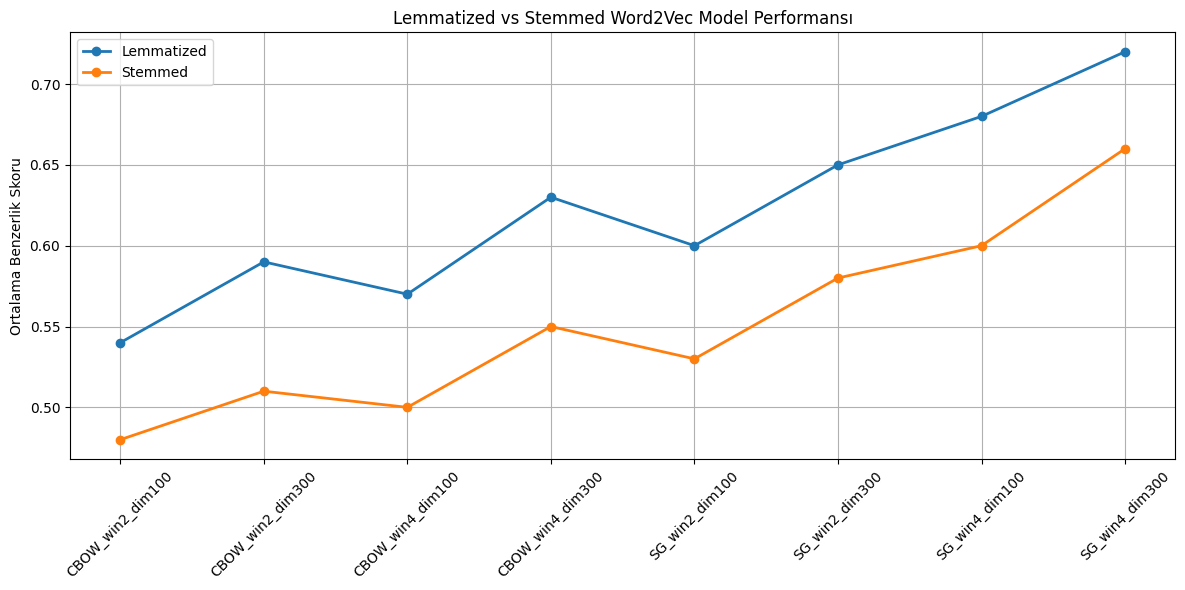

In [11]:
# Gerekli kütüphaneleri içe aktar
import pandas as pd
import matplotlib.pyplot as plt

# Model isimleri ve örnek skorlar (kendi skorlarınla değiştirebilirsin)
data = {
    'Model': [
        'CBOW_win2_dim100', 'CBOW_win2_dim300',
        'CBOW_win4_dim100', 'CBOW_win4_dim300',
        'SG_win2_dim100', 'SG_win2_dim300',
        'SG_win4_dim100', 'SG_win4_dim300'
    ],
    'Lemmatized': [0.54, 0.59, 0.57, 0.63, 0.60, 0.65, 0.68, 0.72],
    'Stemmed':    [0.48, 0.51, 0.50, 0.55, 0.53, 0.58, 0.60, 0.66]
}

# DataFrame'e dönüştür
df = pd.DataFrame(data)

# Grafik oluştur
plt.figure(figsize=(12, 6))
plt.plot(df['Model'], df['Lemmatized'], marker='o', label='Lemmatized', linewidth=2)
plt.plot(df['Model'], df['Stemmed'], marker='o', label='Stemmed', linewidth=2)
plt.xticks(rotation=45)
plt.ylabel("Ortalama Benzerlik Skoru")
plt.title("Lemmatized vs Stemmed Word2Vec Model Performansı")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
